**Brian Blaylock**  
**August 30, 2019**

# Converting HRRR GRIB2 data to Zarr

I am experimenting with different ways the HRRR dataset should be chunked with the following considerations.

- Ability to download subsets of the data (smaller regions) or a point.
- Ability to download timeseries at a point or small subset.
- Ability to grab multiple variables.
- Ability to grab data by model run hour (all forecasts) or grab all forecast for a single valid time.

In [55]:
import xarray
import zarr
import matplotlib.pyplot as plt

In [9]:
import os
os.getcwd()

'/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/demo'

In [36]:
x = xarray.open_dataset('./zarr/HRRRdata/hrrr.t00z.wrfsfcf00.grib2', engine='cfgrib',
                        backend_kwargs=dict(filter_by_keys={'typeOfLevel': 'heightAboveGround', 'level': 2}))

In [37]:
x1 = xarray.open_dataset('./zarr/HRRRdata/hrrr.t00z.wrfsfcf01.grib2', engine='cfgrib',
                        backend_kwargs=dict(filter_by_keys={'typeOfLevel': 'heightAboveGround', 'level': 2}))

In [46]:
x.to_zarr('HRRR_f00.zarr')

In [47]:
z = zarr.open('HRRR_f00.zarr')

In [48]:
z.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.DirectoryStore
No. members,11
No. arrays,11
No. groups,0
Arrays,"d2m, heightAboveGround, latitude, longitude, pt, q, r2, step, t2m, time, valid_time"


In [49]:
z.attrs.keys()

dict_keys(['Conventions', 'GRIB_centre', 'GRIB_centreDescription', 'GRIB_edition', 'GRIB_subCentre', 'history', 'institution'])

In [53]:
z.t2m.info

Name,/t2m
Type,zarr.core.Array
Data type,float32
Shape,"(1059, 1799)"
Chunk shape,"(265, 450)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,7620564 (7.3M)
No. bytes stored,2182649 (2.1M)


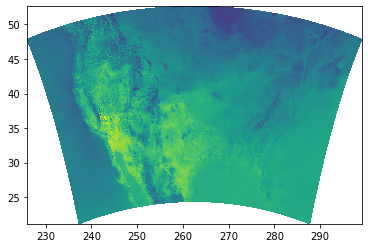

In [58]:
plt.pcolormesh(z.longitude[:], z.latitude[:], z.t2m[:])

In [57]:
z.latitude

<zarr.core.Array '/latitude' (1059, 1799) float64>